# MLToolKit Example
Create Date: July 1, 2018; Last Update: August 12, 2019. 
Apache License, Version 2.0 (http://www.apache.org/licenses/LICENSE-2.0)
<hr>

### Current release: PyMLToolKit [v0.1.6]

MLToolkit (mltk) is a Python package providing a set of user-friendly functions to help building machine learning models in data science research, teaching or production focused projects. MLToolkit supports all stages of the machine learning application development process.

### Installation
```
pip install pymltoolkit
```
If the installation failed with dependancy issues, execute the above command with --no-dependencies

```
pip install pymltoolkit --no-dependencies
```

# Content <a class="anchor" id="toc"></a>
* [Introduction](#intro)
* [Load Dataset](#load)
* [Explore Dataset](#eplore)
* [Create Modeling Dataset](#features)
* [Second Bullet Header](#inout)
* [Run Classifier Algorithms](#model)
* [Model Evaluation](#evaluate)
* [Test and Deploy](#deploy)


# Adult Census Income <a class="anchor" id="intro"></a> 
## Predict whether income exceeds $50K/yr based on census data.
Source: https://www.kaggle.com/uciml/adult-census-income/home
<br>
[^](#toc) 

Input Data Attributes:

<ul>
<li>[age]: continuous</li>
<li>[workclass]: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked</li>
<li>[fnlwgt]: continuous. final weight. In other words, this is the number of people the census believes the entry represents.</li>
<li>[education]: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool</li>
<li>[education-num]: The highest level of education achieved in numerical form. continuous</li>
<li>[marital-status]: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse</li>
<li>[occupation]: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces</li>
<li>[relationship]: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried</li>
<li>[race]: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black</li>
<li>[sex]: Female, Male</li>
<li>[capital-gain]: continuous</li>
<li>[capital-loss]: continuous</li>
<li>[hours-per-week]: continuous</li>
<li>[native-country]: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands</li>
<li>[income]: RESPONSE (">50K", "<=50K") </li>
</ul>



# 1. Load Python libraries 

In [1]:
import numpy as np
import pandas as pd
import mltk as mltk
import os
%matplotlib inline

mltk==0.1.6


# 2. Load Dataset <a class="anchor" id="load"></a>
[^](#toc) 

In [2]:
MODEL_SAVE_FOLDER = r'C:\Projects\API\MODELS'

In [3]:
# Load dataset
Data = mltk.read_data_csv(file=r'C:\Projects\Data\incomedata.csv')
# Clean column names (remove special characters)
Data = mltk.clean_column_names(Data, replace='')
# Add ID column
Data = mltk.add_identity_column(Data, id_label='ID', start=1, increment=1)
Data.head(3)

,ID,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,income
0,1,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,2,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,3,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K


# 3. Explore Dataset <a class="anchor" id="explore"></a>
[^](#toc)

## 3.1 Fields, Data Types, Bastic Statistics

In [4]:
# Analyze Response Target
target_source='income'
mltk.variable_frequency(DataFrame=Data, variable=target_source).style.background_gradient(cmap='Greens').set_precision(3)

,Counts,CountsFraction%
income,,
<=50K,24720,75.9
>50K,7841,24.1
TOTAL,32561,100


In [5]:
# Set Target Valriable
targetVariable = 'HighIncome'
targetCondition = "income=='>50K'" #For Binary Classification

Data=mltk.set_binary_target(Data, condition_str=targetCondition, to_variable=targetVariable)
mltk.variable_frequency(DataFrame=Data, variable=targetVariable).style.background_gradient(cmap='Greens').set_precision(3)

,Counts,CountsFraction%
HighIncome,,
0,24720,75.9
1,7841,24.1
TOTAL,32561,100


In [6]:
rule_set = {
    'operation':'condition',  
    'variables': {
        'source': None, 
        'destination':'HighIncome2'
    },    
    'parameters': {
        "condition_str":"income=='>50K'",
        "default":0,
        "null":0,
    }
}

Data, targetVariabl2 = mltk.create_target_variable_task(Data, rule_set, return_variable=True)
mltk.variable_frequency(DataFrame=Data, variable=targetVariabl2).style.background_gradient(cmap='Greens').set_precision(3)

,Counts,CountsFraction%
HighIncome2,,
0,24720,75.9
1,7841,24.1
TOTAL,32561,100


In [7]:
Data[[targetVariable,target_source]].sample(5).style.background_gradient(cmap='Greens').set_precision(3)

,HighIncome,income
13952,0,<=50K
16725,0,<=50K
21040,0,<=50K
14511,0,<=50K
19339,0,<=50K


In [8]:
# Flag Records to Exclude
excludeCondition="age < 18"
action = 'flag' # 'drop' #
excludeLabel = 'EXCLUDE'
Data=mltk.exclude_records(Data, exclude_condition=excludeCondition, action=action, exclude_label=excludeLabel) # )#
# Get Dataset stats
Data.sample(3).transpose()

Records age < 18 -> EXCLUDE=1
0 records were excluded


,21915,20533,26517
ID,21916,20534,26518
age,41,28,55
workclass,Private,Private,Private
fnlwgt,144947,22422,225365
education,Bachelors,HS-grad,HS-grad
educationnum,13,9,9
maritalstatus,Divorced,Never-married,Widowed
occupation,Exec-managerial,Exec-managerial,Other-service
relationship,Unmarried,Not-in-family,Unmarried
race,Black,White,White


In [9]:
DataStats = mltk.data_description(Data)
DataStats

,count,unique,top,freq,mean,std,min,10%,25%,50%,75%,90%,max,dtypes
ID,32561,None,None,None,16281,9399.7,1,3257,8141,16281,24421,29305,32561,int64
age,32561,None,None,None,38.582,13.64,17,22,28,37,48,58,90,int64
workclass,32561,9,Private,22696,None,None,None,None,None,None,None,None,None,object
fnlwgt,32561,None,None,None,1.8978e+05,1.0555e+05,12285,65716,1.1783e+05,1.7836e+05,2.3705e+05,3.2905e+05,1.4847e+06,int64
education,32561,16,HS-grad,10501,None,None,None,None,None,None,None,None,None,object
educationnum,32561,None,None,None,10.081,2.5727,1,7,9,10,12,13,16,int64
maritalstatus,32561,7,Married-civ-spouse,14976,None,None,None,None,None,None,None,None,None,object
occupation,32561,15,Prof-specialty,4140,None,None,None,None,None,None,None,None,None,object
relationship,32561,6,Husband,13193,None,None,None,None,None,None,None,None,None,object
race,32561,5,White,27816,None,None,None,None,None,None,None,None,None,object


## 3.2 Inspect Categorical Variables

In [10]:
sourceVariable='nativecountry'
table = mltk.variable_frequency(Data, variable=sourceVariable, sorted=True, show_plot=False)
table.style.background_gradient(cmap='Greens').set_precision(3)

,Counts,CountsFraction%
nativecountry,,
United-States,29170,89.6
Mexico,643,1.97
?,583,1.79
Philippines,198,0.608
Germany,137,0.421
Canada,121,0.372
Puerto-Rico,114,0.35
El-Salvador,106,0.326
India,100,0.307


In [11]:
sourceVariable='maritalstatus'
table = mltk.variable_frequency(Data, variable=sourceVariable, show_plot=False)
table.style.background_gradient(cmap='Greens').set_precision(3)

,Counts,CountsFraction%
maritalstatus,,
Divorced,4443,13.6
Married-AF-spouse,23,0.0706
Married-civ-spouse,14976,46
Married-spouse-absent,418,1.28
Never-married,10683,32.8
Separated,1025,3.15
Widowed,993,3.05
TOTAL,32561,100


## 3.3 Inspect Continious/Numerical Variables

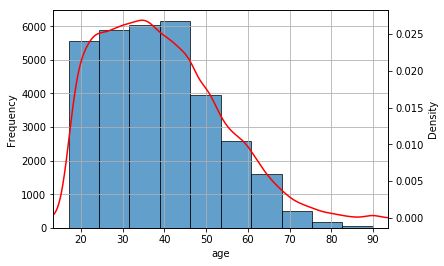

,counts,density
age,,
"1_[17,24.3]",5570,0.0234
"2_[24.3,31.6]",5890,0.0248
"3_[31.6,38.9]",6048,0.0254
"4_[38.9,46.2]",6163,0.0259
"5_[46.2,53.5]",3967,0.0167
"6_[53.5,60.8]",2591,0.0109
"7_[60.8,68.1]",1595,0.00671
"8_[68.1,75.4]",496,0.00209
"9_[75.4,82.7]",174,0.000732


In [12]:
sourceVariable='age'
table = mltk.histogram(Data, variable=sourceVariable, n_bins=10, orientation='vertical', density=True, show_plot=True)
table.style.background_gradient(cmap='Greens').set_precision(3)

# 4. Creating Feature Variables <a class="anchor" id="features"></a>
[^](#toc) 

## 4.1 Inspect Categorical Variables

In [13]:
categoryVariables = set({'sex', 'race', 'occupation', 'workclass', 'maritalstatus', 'relationship'})
binaryVariables = set({})
print(mltk.category_lists(Data, list(categoryVariables)))

{
    "relationship": [
        "Not-in-family",
        "Unmarried",
        "Own-child",
        "Other-relative",
        "Husband",
        "Wife"
    ],
    "maritalstatus": [
        "Widowed",
        "Divorced",
        "Separated",
        "Never-married",
        "Married-civ-spouse",
        "Married-spouse-absent",
        "Married-AF-spouse"
    ],
    "race": [
        "White",
        "Black",
        "Asian-Pac-Islander",
        "Other",
        "Amer-Indian-Eskimo"
    ],
    "occupation": [
        "?",
        "Exec-managerial",
        "Machine-op-inspct",
        "Prof-specialty",
        "Other-service",
        "Adm-clerical",
        "Craft-repair",
        "Transport-moving",
        "Handlers-cleaners",
        "Sales",
        "Farming-fishing",
        "Tech-support",
        "Protective-serv",
        "Armed-Forces",
        "Priv-house-serv"
    ],
    "workclass": [
        "?",
        "Private",
        "State-gov",
        "Federal-gov",
        "Self

## 4.2 Tranform Variables

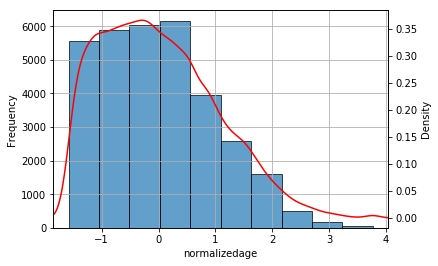

,counts,density
normalizedage,,
"1_[-1.58218,-1.04701]",5570,0.32
"2_[-1.04701,-0.511835]",5890,0.338
"3_[-0.511835,0.0233389]",6048,0.347
"4_[0.0233389,0.558513]",6163,0.354
"5_[0.558513,1.09369]",3967,0.228
"6_[1.09369,1.62886]",2591,0.149
"7_[1.62886,2.16403]",1595,0.0915
"8_[2.16403,2.69921]",496,0.0285
"9_[2.69921,3.23438]",174,0.00999


In [14]:
rule_set = {
    "operation":"normalize", 
    'variables': {
        'source':'age', 
        'destination':'normalizedage'
    },
    "parameters":{"method":"zscore"}
}
Data, transformed_variable = mltk.create_transformed_variable_task(Data, rule_set, return_variable=True)
table = mltk.histogram(Data, variable=transformed_variable, n_bins=10, orientation='vertical', density=True, show_plot=True)
table.style.background_gradient(cmap='Greens').set_precision(3)

## 4.3 Merge Categories

In [15]:
rule_set = {
    'operation':'catmerge',
    'variables': {
        'source':'maritalstatus', 
        'destination':'maritalstatus'
    },     
    'parameters': { 
            'group_value':'Married',
            'values':["Married-civ-spouse", "Married-spouse-absent", "Married-AF-spouse"],
            'case': True
    }
} 

Data, mergedVariable = mltk.merge_categories_task(Data, rule_set, return_variable=True)
table = mltk.variable_frequency(Data, variable=mergedVariable, show_plot=False)
table.style.background_gradient(cmap='Greens').set_precision(3)

,Counts,CountsFraction%
maritalstatus,,
Divorced,4443,13.6
Married,15417,47.3
Never-married,10683,32.8
Separated,1025,3.15
Widowed,993,3.05
TOTAL,32561,100


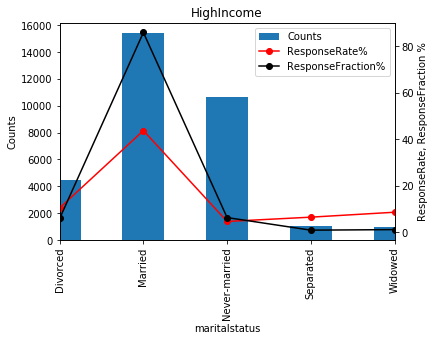

,Counts,HighIncome,CountsFraction%,ResponseFraction%,ResponseRate%
maritalstatus,,,,,
Divorced,4443,463,13.64516,5.90486,10.42089
Married,15417,6736,47.34805,85.90741,43.69203
Never-married,10683,491,32.80919,6.26196,4.59609
Separated,1025,66,3.14794,0.84173,6.43902
Widowed,993,85,3.04966,1.08405,8.55992
TOTAL,32561,7841,100.00000,100.00000,24.08096


In [16]:
mltk.variable_response(DataFrame=Data, variable=mergedVariable, target_variable=targetVariable, show_plot=True)

## 4.4 Group Countries into Entities

In [17]:
rule_set = {
    'operation':'dictionary', 
    'variables': {
        'source':'nativecountry', 
        'destination':'nativecountryGRP'
    },
    'parameters': {    
        'match_type': None, # values|pattern|mix
        "dictionary": [
            {
                    "entity":"USA",
                    "values":["United-States"],
                    'case': True
            },
            {
                    "entity":"Canada",
                    "values":["Canada"],
                    'case': True
            },
            { 
                    "entity":"OtherAmericas",  
                    "values":["South", "Mexico", "Trinadad&Tobago", "Jamaica", "Peru", "Nicaragua", "Dominican-Republic", "Haiti", "Ecuador", "El-Salvador", "Columbia", "Honduras", "Guatemala", "Puerto-Rico", "Cuba", "Outlying-US(Guam-USVI-etc)"],
                    'case': True
            },
            {
                    "entity":"Europe-Med",
                    "values":["Greece", "Holand-Netherlands", "Poland", "Iran", "England", "Germany", "Italy", "Ireland", "Hungary", "France", "Yugoslavia", "Scotland", "Portugal"],
                    'case': True
            },
            {
                    "entity":"Asia",
                    "values": [ "Vietnam", "China", "Taiwan", "India", "Philippines", "Japan", "Hong", "Cambodia", "Laos", "Thailand"],
                    'case': True
            },
            {
                    "entity":"Other",
                    "values": ["?"],
                    'case': True
            }
        ],
        "null":"NA",
        "default":"OTHER"
    }  
}

Data, entityVariable = mltk.create_entity_variable_task(Data, rule_set, return_variable=True)
categoryVariables.add(entityVariable)
table = mltk.variable_frequency(Data, variable=entityVariable, show_plot=False)
table.style.background_gradient(cmap='Greens').set_precision(3)

,Counts,CountsFraction%
nativecountryGRP,,
Asia,628,1.93
Canada,121,0.372
Europe-Med,564,1.73
Other,583,1.79
OtherAmericas,1495,4.59
USA,29170,89.6
TOTAL,32561,100


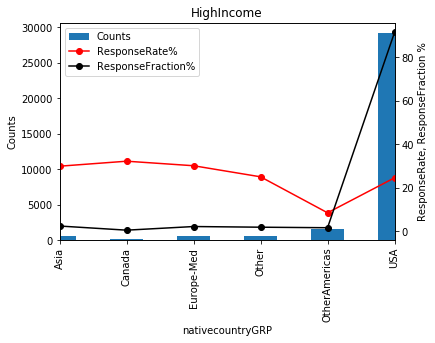

,Counts,HighIncome,CountsFraction%,ResponseFraction%,ResponseRate%
nativecountryGRP,,,,,
Asia,628,188,1.92869,2.39765,29.93631
Canada,121,39,0.37161,0.49739,32.23140
Europe-Med,564,170,1.73213,2.16809,30.14184
Other,583,146,1.79049,1.86201,25.04288
OtherAmericas,1495,127,4.59138,1.61969,8.49498
USA,29170,7171,89.58570,91.45517,24.58348
TOTAL,32561,7841,100.00000,100.00000,24.08096


In [18]:
mltk.variable_response(DataFrame=Data, variable=entityVariable, target_variable=targetVariable, show_plot=True)

## 4.4 Response Rate For Categorical Variables

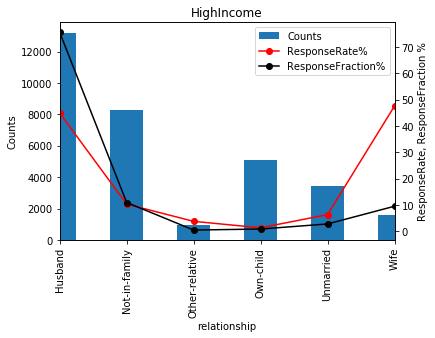

                Counts  HighIncome  CountsFraction%  ResponseFraction%  ResponseRate%
relationship                                                                         
Husband          13193        5918         40.51780           75.47507       44.85712
Not-in-family     8305         856         25.50597           10.91697       10.30704
Other-relative     981          37          3.01281            0.47188        3.77166
Own-child         5068          67         15.56463            0.85448        1.32202
Unmarried         3446         218         10.58321            2.78026        6.32618
Wife              1568         745          4.81558            9.50134       47.51276
TOTAL            32561        7841        100.00000          100.00000       24.08096


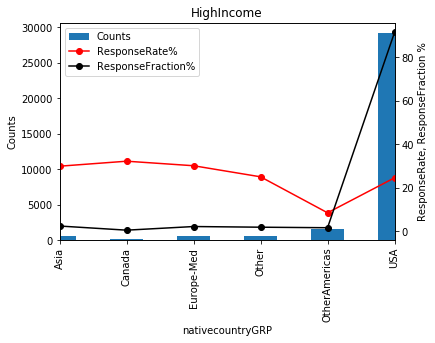

                  Counts  HighIncome  CountsFraction%  ResponseFraction%  ResponseRate%
nativecountryGRP                                                                       
Asia                 628         188          1.92869            2.39765       29.93631
Canada               121          39          0.37161            0.49739       32.23140
Europe-Med           564         170          1.73213            2.16809       30.14184
Other                583         146          1.79049            1.86201       25.04288
OtherAmericas       1495         127          4.59138            1.61969        8.49498
USA                29170        7171         89.58570           91.45517       24.58348
TOTAL              32561        7841        100.00000          100.00000       24.08096


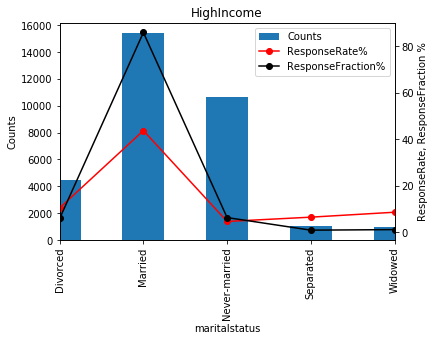

               Counts  HighIncome  CountsFraction%  ResponseFraction%  ResponseRate%
maritalstatus                                                                       
Divorced         4443         463         13.64516            5.90486       10.42089
Married         15417        6736         47.34805           85.90741       43.69203
Never-married   10683         491         32.80919            6.26196        4.59609
Separated        1025          66          3.14794            0.84173        6.43902
Widowed           993          85          3.04966            1.08405        8.55992
TOTAL           32561        7841        100.00000          100.00000       24.08096


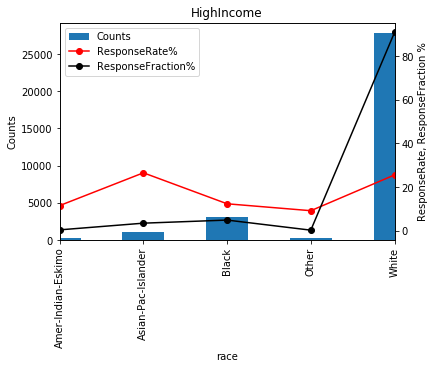

                    Counts  HighIncome  CountsFraction%  ResponseFraction%  ResponseRate%
race                                                                                     
Amer-Indian-Eskimo     311          36          0.95513            0.45913       11.57556
Asian-Pac-Islander    1039         276          3.19093            3.51996       26.56400
Black                 3124         387          9.59430            4.93559       12.38796
Other                  271          25          0.83228            0.31884        9.22509
White                27816        7117         85.42735           90.76648       25.58599
TOTAL                32561        7841        100.00000          100.00000       24.08096


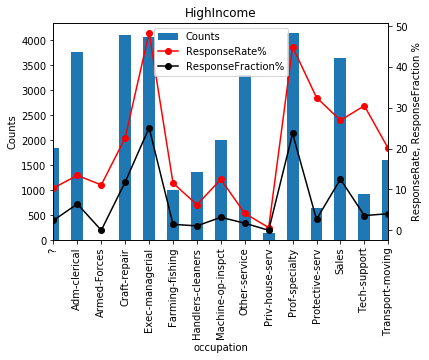

                   Counts  HighIncome  CountsFraction%  ResponseFraction%  ResponseRate%
occupation                                                                              
?                    1843         191          5.66015            2.43591       10.36354
Adm-clerical         3770         507         11.57827            6.46601       13.44828
Armed-Forces            9           1          0.02764            0.01275       11.11111
Craft-repair         4099         929         12.58868           11.84798       22.66406
Exec-managerial      4066        1968         12.48733           25.09884       48.40138
Farming-fishing       994         115          3.05273            1.46665       11.56942
Handlers-cleaners    1370          86          4.20749            1.09680        6.27737
Machine-op-inspct    2002         250          6.14846            3.18837       12.48751
Other-service        3295         137         10.11947            1.74723        4.15781
Priv-house-serv      

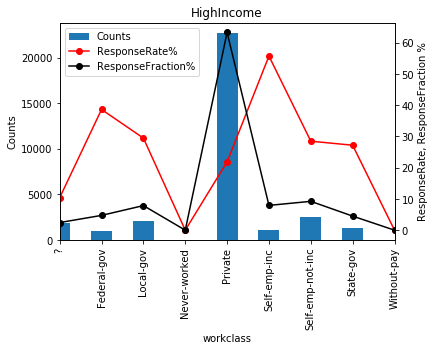

                  Counts  HighIncome  CountsFraction%  ResponseFraction%  ResponseRate%
workclass                                                                              
?                   1836         191          5.63865            2.43591       10.40305
Federal-gov          960         371          2.94831            4.73154       38.64583
Local-gov           2093         617          6.42794            7.86889       29.47922
Never-worked           7           0          0.02150            0.00000        0.00000
Private            22696        4963         69.70302           63.29550       21.86729
Self-emp-inc        1116         622          3.42741            7.93266       55.73477
Self-emp-not-inc    2541         724          7.80381            9.23352       28.49272
State-gov           1298         353          3.98636            4.50198       27.19569
Without-pay           14           0          0.04300            0.00000        0.00000
TOTAL              32561        

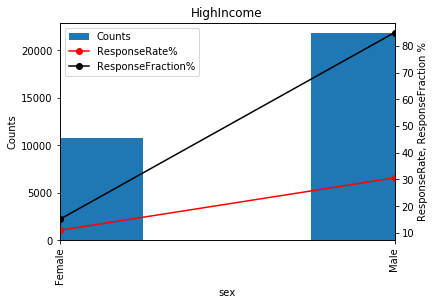

        Counts  HighIncome  CountsFraction%  ResponseFraction%  ResponseRate%
sex                                                                          
Female   10771        1179         33.07945           15.03635       10.94606
Male     21790        6662         66.92055           84.96365       30.57366
TOTAL    32561        7841        100.00000          100.00000       24.08096


In [19]:
mltk.variable_responses(Data, variables=categoryVariables, target_variable=targetVariable, show_output=True, show_plot=True)

## 4.5 Create Categorical Variables from continious variables

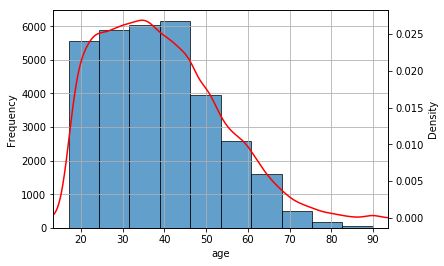

               counts  density
age                           
1_[17,24.3]      5570  0.02343
2_[24.3,31.6]    5890  0.02478
3_[31.6,38.9]    6048  0.02544
4_[38.9,46.2]    6163  0.02593
5_[46.2,53.5]    3967  0.01669
6_[53.5,60.8]    2591  0.01090
7_[60.8,68.1]    1595  0.00671
8_[68.1,75.4]     496  0.00209
9_[75.4,82.7]     174  0.00073
10_[82.7,90]       67  0.00028
TOTAL           32561      NaN


In [20]:
sourceVariable='age'
table = mltk.histogram(Data, sourceVariable, n_bins=10, orientation='vertical', density=True, show_plot=True)
print(table)

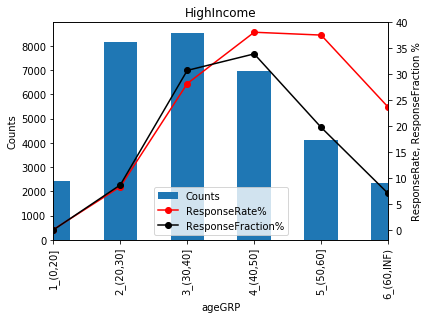

,Counts,HighIncome,CountsFraction%,ResponseFraction%,ResponseRate%
ageGRP,,,,,
"1_(0,20]",2410,2,7.40149,0.02551,0.08299
"2_(20,30]",8162,680,25.06680,8.67236,8.33129
"3_(30,40]",8546,2406,26.24612,30.68486,28.15352
"4_(40,50]",6983,2655,21.44590,33.86048,38.02091
"5_(50,60]",4128,1547,12.67774,19.72963,37.47578
"6_(60,INF)",2332,551,7.16194,7.02716,23.62779
TOTAL,32561,7841,100.00000,100.00000,24.08096


In [21]:
rule_set = {   
    'operation':'bucket',
    'variables': {
        'source':'age', 
        'destination':None
    },
    'parameters': {
        'labels_str': ['0', '20', '30', '40', '50', '60', 'INF'],
        'right_inclusive':True,
        "default":'OTHER',
        "null": 'NA'
    }
}
Data, categoryVariable = mltk.create_categorical_variable_task(Data, rule_set, return_variable=True)
categoryVariables.add(categoryVariable)
mltk.variable_response(DataFrame=Data, variable=categoryVariable, target_variable=targetVariable, show_plot=True)

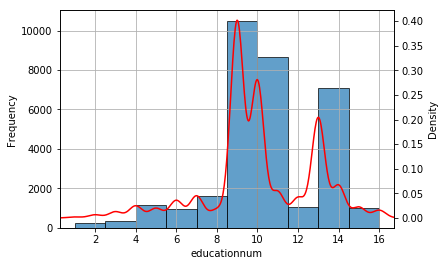

,counts,density
educationnum,,
"1_[1,2.5]",219,0.00448
"2_[2.5,4]",333,0.00682
"3_[4,5.5]",1160,0.02375
"4_[5.5,7]",933,0.01910
"5_[7,8.5]",1608,0.03292
"6_[8.5,10]",10501,0.21500
"7_[10,11.5]",8673,0.17757
"8_[11.5,13]",1067,0.02185
"9_[13,14.5]",7078,0.14492


In [22]:
sourceVariable='educationnum'
mltk.histogram(Data, sourceVariable, n_bins=10, orientation='vertical', density=True, show_plot=True)

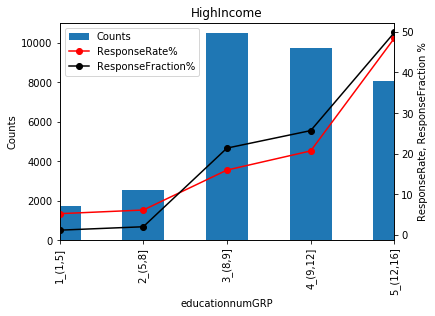

,Counts,HighIncome,CountsFraction%,ResponseFraction%,ResponseRate%
educationnumGRP,,,,,
"1_(1,5]",1712,89,5.25782,1.13506,5.19860
"2_(5,8]",2541,155,7.80381,1.97679,6.09996
"3_(8,9]",10501,1675,32.25024,21.36207,15.95086
"4_(9,12]",9740,2013,29.91309,25.67275,20.66735
"5_(12,16]",8067,3909,24.77504,49.85334,48.45668
TOTAL,32561,7841,100.00000,100.00000,24.08096


In [23]:
rule_set = {
    'operation':'bucket',
    'variables': {
        'source':'educationnum', 
        'destination':None
    },
    'parameters': {
        'labels_str': ['1', '5', '8', '9', '12', '16'],
        'right_inclusive':True,
        "default":'OTHER',
        "null": 'NA'
    }
}
Data, categoryVariable = mltk.create_categorical_variable_task(Data, rule_set, return_variable=True)
categoryVariables.add(categoryVariable)
mltk.variable_response(DataFrame=Data, variable=categoryVariable, target_variable=targetVariable, show_plot=True)

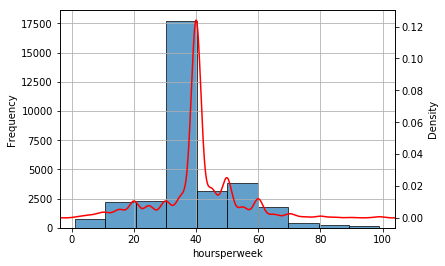

,counts,density
hoursperweek,,
"1_[1,10.8]",736,0.00231
"2_[10.8,20.6]",2192,0.00687
"3_[20.6,30.4]",2317,0.00726
"4_[30.4,40.2]",17735,0.05558
"5_[40.2,50]",3119,0.00977
"6_[50,59.8]",3877,0.01215
"7_[59.8,69.6]",1796,0.00563
"8_[69.6,79.4]",448,0.00140
"9_[79.4,89.2]",202,0.00063


In [24]:
sourceVariable='hoursperweek'
mltk.histogram(Data, sourceVariable, n_bins=10, orientation='vertical', density=True, show_plot=True)

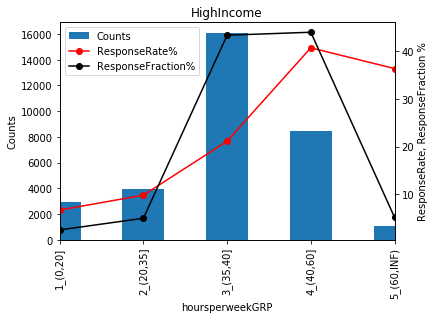

,Counts,HighIncome,CountsFraction%,ResponseFraction%,ResponseRate%
hoursperweekGRP,,,,,
"1_(0,20]",2928,195,8.99235,2.48693,6.65984
"2_(20,35]",3952,387,12.13722,4.93559,9.79251
"3_(35,40]",16100,3403,49.44566,43.40008,21.13665
"4_(40,60]",8471,3452,26.01579,44.02500,40.75080
"5_(60,INF)",1110,404,3.40899,5.15240,36.39640
TOTAL,32561,7841,100.00000,100.00000,24.08096


In [25]:
rule_set = {
    'operation':'bucket',
    'variables': {
        'source':'hoursperweek', 
        'destination':None
    },
    'parameters': {
        'labels_str': ['0', '20', '35', '40', '60', 'INF'],
        'right_inclusive':True,
        "default":'OTHER',
        "null": 'NA'
    }
}

Data, categoryVariable = mltk.create_categorical_variable_task(Data, rule_set, return_variable=True)
categoryVariables.add(categoryVariable)
mltk.variable_response(DataFrame=Data, variable=categoryVariable, target_variable=targetVariable, show_plot=True)

#### Usage Example:  String Similarity

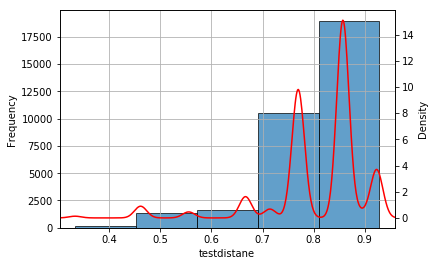

,counts,density
testdistane,,
"1_[0.333333,0.452381]",130,0.03354
"2_[0.452381,0.571429]",1332,0.34363
"3_[0.571429,0.690476]",1601,0.41302
"4_[0.690476,0.809524]",10538,2.71857
"5_[0.809524,0.928571]",18960,4.89125
TOTAL,32561,NaN


In [26]:
rule_set = {
    'type':'comparison_str',
    'include': False,    
    'variables': {
        "source1":"maritalstatus", 
        "source2":"relationship",  
        'destination':'testdistane'
    },     
    'operation':'levenshtein', 
    'parameters':{
        'case_sensitive':True,
        'normalize':True
    }
}

Data, string_comparison_variable = mltk.create_str_comparison_variable_task(Data, rule_set, return_variable=True)
mltk.histogram(Data, string_comparison_variable, n_bins=5, orientation='vertical', density=True, show_plot=True)

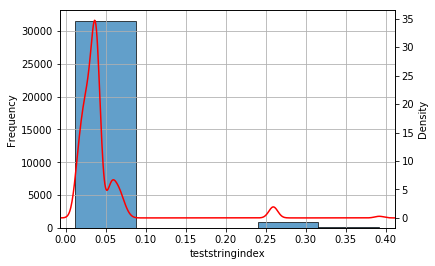

,counts,density
teststringindex,,
"1_[0.0114943,0.0876268]",31550,12.72716
"2_[0.0876268,0.163759]",0,0.00000
"3_[0.163759,0.239892]",0,0.00000
"4_[0.239892,0.316024]",881,0.35539
"5_[0.316024,0.392157]",130,0.05244
TOTAL,32561,NaN


In [27]:
rule_set = {
    'type':'comparison_str',
    'include': True,
    'variables': {
        'source1':'maritalstatus', 
        'source2':'relationship', 
        'destination':'teststringindex'
    },
    'operation':'jaccard',  
    'parameters':{
        'case_sensitive':True, 
        'min_length':1, 
        'max_length':4000, 
    }
}

Data, string_comparison_variable = mltk.create_str_comparison_variable_task(Data, rule_set, return_variable=True)
mltk.histogram(Data, string_comparison_variable, n_bins=5, orientation='vertical', density=True, show_plot=True)

#### Usage Example: String Pattern Count

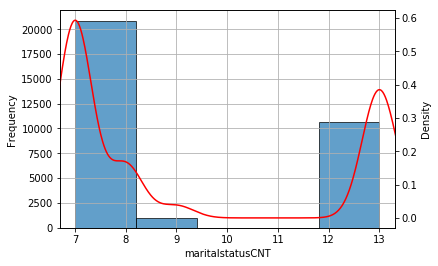

,counts,density
maritalstatusCNT,,
"1_[7,8.2]",20853,0.53369
"2_[8.2,9.4]",1025,0.02623
"3_[9.4,10.6]",0,0.00000
"4_[10.6,11.8]",0,0.00000
"5_[11.8,13]",10683,0.27341
TOTAL,32561,NaN


In [28]:
rule_set = {
    'type': 'transform_str',
    'variables': {
        'source':'maritalstatus', 
        'destination':'maritalstatusCNT'
    },  
    'operation':'strcount',  
    'include': True,
    'parameters':{
        'pattern':'*',
        'case_sensitive':True
    }
}

Data, string_transform_variable = mltk.create_str_transformed_variable_task(Data, rule_set, return_variable=True)
mltk.histogram(Data, string_transform_variable, n_bins=5, orientation='vertical', density=True, show_plot=True)

# 5. Create Modeling dataset <a class="anchor" id="input"></a>

### Feature/Predictor variables (X) and Response variable (y)
[^](#toc) 

## 5.1 Variables setup

In [29]:
identifierColumns = ['ID']
categoryVariables=list(categoryVariables)
binaryVariables=list(binaryVariables)
targetVariable = targetVariable
modelDataStats = mltk.data_description(Data)
modelDataStats

,count,unique,top,freq,mean,std,min,10%,25%,50%,75%,90%,max,dtypes
ID,32561,None,None,None,16281,9399.7,1,3257,8141,16281,24421,29305,32561,int64
age,32561,None,None,None,38.582,13.64,17,22,28,37,48,58,90,int64
workclass,32561,9,Private,22696,None,None,None,None,None,None,None,None,None,object
fnlwgt,32561,None,None,None,1.8978e+05,1.0555e+05,12285,65716,1.1783e+05,1.7836e+05,2.3705e+05,3.2905e+05,1.4847e+06,int64
education,32561,16,HS-grad,10501,None,None,None,None,None,None,None,None,None,object
educationnum,32561,None,None,None,10.081,2.5727,1,7,9,10,12,13,16,int64
maritalstatus,32561,5,Married,15417,None,None,None,None,None,None,None,None,None,object
occupation,32561,15,Prof-specialty,4140,None,None,None,None,None,None,None,None,None,object
relationship,32561,6,Husband,13193,None,None,None,None,None,None,None,None,None,object
race,32561,5,White,27816,None,None,None,None,None,None,None,None,None,object


In [30]:
Data[identifierColumns+binaryVariables+categoryVariables+[targetVariable]].sample(5).transpose()
#mltk.plot_variable_responses(Data, variables=categoryVariables+binaryVariables, target_variable=targetVariable)

,27334,1145,16718,23484,26744
ID,27335,1146,16719,23485,26745
maritalstatus,Married,Married,Never-married,Married,Divorced
educationnumGRP,"5_(12,16]","3_(8,9]","5_(12,16]","1_(1,5]","5_(12,16]"
occupation,Farming-fishing,Sales,Protective-serv,?,Craft-repair
relationship,Husband,Husband,Not-in-family,Husband,Not-in-family
workclass,Private,Private,Federal-gov,?,Self-emp-not-inc
hoursperweekGRP,"3_(35,40]","4_(40,60]","4_(40,60]","2_(20,35]","3_(35,40]"
race,White,White,White,White,White
sex,Male,Male,Female,Male,Male
ageGRP,"4_(40,50]","3_(30,40]","2_(20,30]","6_(60,INF)","4_(40,50]"


## 5.2 Create One Hot Encoded Variables

In [31]:
Data, featureVariables, targetVariable = mltk.to_one_hot_encode(Data, category_variables=categoryVariables, binary_variables=binaryVariables, target_variable=targetVariable)
Data[identifierColumns+featureVariables+[targetVariable]].sample(5).transpose()

,15408,31265,8999,6940,10036
ID,15409,31266,9000,6941,10037
maritalstatus_Divorced,1,0,0,0,0
maritalstatus_Married,0,1,0,1,0
maritalstatus_Never-married,0,0,1,0,1
maritalstatus_Separated,0,0,0,0,0
maritalstatus_Widowed,0,0,0,0,0
"educationnumGRP_1_(1,5]",0,0,0,0,0
"educationnumGRP_2_(5,8]",0,0,0,0,0
"educationnumGRP_3_(8,9]",0,1,0,1,0
"educationnumGRP_4_(9,12]",1,0,1,0,1


## 5.3 Analyze Correlation

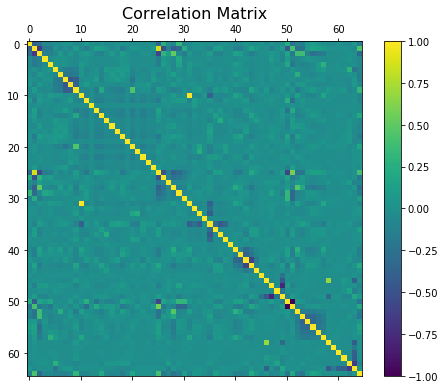

,Variable1,Variable2,Correlation,|Correlation|,corrTargetVariable1,corrTargetVariable2
1925,sex_Female,sex_Male,-1,1,-0.216,0.216
605,occupation_?,workclass_?,0.998,0.998,-0.0786,-0.0782
86,maritalstatus_Married,relationship_Husband,0.87,0.87,0.435,0.401
1881,race_Black,race_White,-0.789,0.789,-0.0891,0.0852
1874,race_Asian-Pac-Islander,nativecountryGRP_Asia,0.694,0.694,0.0105,0.0192
63,maritalstatus_Married,maritalstatus_Never-married,-0.663,0.663,0.435,-0.318
2015,nativecountryGRP_OtherAmericas,nativecountryGRP_USA,-0.643,0.643,-0.08,0.0345
1785,"hoursperweekGRP_3_(35,40]","hoursperweekGRP_4_(40,60]",-0.586,0.586,-0.0681,0.231
1299,relationship_Husband,sex_Female,-0.58,0.58,0.401,-0.216
1300,relationship_Husband,sex_Male,0.58,0.58,0.401,0.216


In [32]:
correlation=mltk.correlation_matrix(Data, featureVariables+[targetVariable], target_variable=targetVariable, method='pearson', return_type='list', show_plot=True)
correlation.head(10).style.background_gradient(cmap='RdYlGn').set_precision(3)

## Split data to train and test datasets

In [33]:
TrainDataset, ValidateDataset, TestDataset = mltk.train_validate_test_split(Data, ratios=(0.6,0.2,0.2))

Train Samples: 19536 [60.0%]
Validate Samples: 6512 [20.0%]
Test Samples: 6513 [20.0%]


In [34]:
featureVariables

['maritalstatus_Divorced',
 'maritalstatus_Married',
 'maritalstatus_Never-married',
 'maritalstatus_Separated',
 'maritalstatus_Widowed',
 'educationnumGRP_1_(1,5]',
 'educationnumGRP_2_(5,8]',
 'educationnumGRP_3_(8,9]',
 'educationnumGRP_4_(9,12]',
 'educationnumGRP_5_(12,16]',
 'occupation_?',
 'occupation_Adm-clerical',
 'occupation_Armed-Forces',
 'occupation_Craft-repair',
 'occupation_Exec-managerial',
 'occupation_Farming-fishing',
 'occupation_Handlers-cleaners',
 'occupation_Machine-op-inspct',
 'occupation_Other-service',
 'occupation_Priv-house-serv',
 'occupation_Prof-specialty',
 'occupation_Protective-serv',
 'occupation_Sales',
 'occupation_Tech-support',
 'occupation_Transport-moving',
 'relationship_Husband',
 'relationship_Not-in-family',
 'relationship_Other-relative',
 'relationship_Own-child',
 'relationship_Unmarried',
 'relationship_Wife',
 'workclass_?',
 'workclass_Federal-gov',
 'workclass_Local-gov',
 'workclass_Never-worked',
 'workclass_Private',
 'workcl

# 6. Run classifier algorithms <a class="anchor" id="model"></a>
[^](#toc) 

## 6.1 Model Variables

In [35]:
# Run classifier algorithms
#model_variables = featureVariables

modelVariables = [
 'race_Amer-Indian-Eskimo',
 'race_Asian-Pac-Islander',
 'race_Black',
 'race_Other',
# 'race_White',
# 'occupation_?',
 'occupation_Adm-clerical',
# 'occupation_Armed-Forces',
 'occupation_Craft-repair',
 'occupation_Exec-managerial',
 'occupation_Farming-fishing',
 'occupation_Handlers-cleaners',
 'occupation_Machine-op-inspct',
 'occupation_Other-service',
# 'occupation_Priv-house-serv',
 'occupation_Prof-specialty',
 'occupation_Protective-serv',
 'occupation_Sales',
 'occupation_Tech-support',
# 'occupation_Transport-moving',
 'maritalstatus_Divorced',
 'maritalstatus_Married',
 'maritalstatus_Never-married',
# 'maritalstatus_Separated',
# 'maritalstatus_Widowed',
 'educationnumGRP_1_(1,5]',
 'educationnumGRP_2_(5,8]',
 'educationnumGRP_3_(8,9]',
 'educationnumGRP_4_(9,12]',
# 'educationnumGRP_5_(12,16]',
 'relationship_Husband',
 'relationship_Not-in-family',
 'relationship_Other-relative',
 'relationship_Own-child',
 'relationship_Unmarried',
# 'relationship_Wife',
# 'ageGRP_1_(0,20]',
 'ageGRP_2_(20,30]',
 'ageGRP_3_(30,40]',
 'ageGRP_4_(40,50]',
 'ageGRP_5_(50,60]',
# 'ageGRP_6_(60,INF)',
 'sex_Female',
# 'sex_Male',
 'nativecountryGRP_Asia',
 'nativecountryGRP_Canada',
 'nativecountryGRP_Europe-Med',
 'nativecountryGRP_Other',
 'nativecountryGRP_OtherAmericas',
# 'nativecountryGRP_USA',
# 'workclass_?',
 'workclass_Federal-gov',
 'workclass_Local-gov',
# 'workclass_Never-worked',
 'workclass_Private',
 'workclass_Self-emp-inc',
 'workclass_Self-emp-not-inc',
 'workclass_State-gov',
# 'workclass_Without-pay',
 'hoursperweekGRP_1_(0,20]',
 'hoursperweekGRP_2_(20,35]',
 'hoursperweekGRP_3_(35,40]',
 'hoursperweekGRP_4_(40,60]',
# 'hoursperweekGRP_5_(60,INF)'
 ]

## 6.2 Model Setup

In [36]:
sample_attributes = {'SampleDescription':'Adult Census Income Dataset',
                    'NumClasses':2,
                    'RecordIdentifiers':identifierColumns,
                    'ModelDataStats':modelDataStats
                    }

score_parameters = {'Edges':[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                    'Threshold':0.5,
                   'Quantiles':10,
                   'ScoreVariable':'Probability',
                   'ScoreLabel':'Score',
                   'QuantileLabel':'Quantile',
                   'PredictedLabel':'Predicted'
                   }

model_attributes = {'ModelID': None,   
                   'ModelName': 'IncomeLevel',
                   'Version':'0.1',
                   }

## 6.3 Models

## 6.3.1 Logistic Regression

Train samples: 19536 loded...
Validate samples: 6512 loded...
Test samples: 6513 loded...
{'ModelID': 'INCOMELEVELLGR20190812083509', 'ModelName': 'IncomeLevel', 'Version': '0.1', 'BuiltTime': '20190812083509', 'ModelFitTime': -1}
{'MLAlgorithm': 'LGR', 'MaxIterations': 100}
Adult Census Income Dataset
{'Edges': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'Threshold': 0.5, 'Quantiles': 10, 'ScoreVariable': 'Probability', 'ScoreLabel': 'Score', 'QuantileLabel': 'Quantile', 'PredictedLabel': 'Predicted'}
Optimization terminated successfully.
         Current function value: 0.343935
         Iterations 9


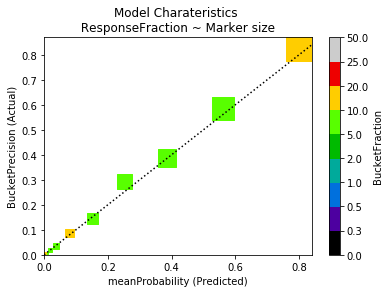

In [37]:
model_parameters = {'MLAlgorithm':'LGR', # 'RF', # 'DFF', # 'CNN', # 'CATBST', # 'XGBST'
                    'MaxIterations':100}  

LGRModel = mltk.build_ml_model(TrainDataset, ValidateDataset, TestDataset, 
                                  model_variables=modelVariables,
                                  variable_setup = None,
                                  target_variable=targetVariable,
                                  model_attributes=model_attributes, 
                                  sample_attributes=sample_attributes, 
                                  model_parameters=model_parameters, 
                                  score_parameters=score_parameters, 
                                  return_model_object=True, 
                                  show_results=False, 
                                  show_plot=True
                                  )

In [38]:
print(LGRModel.model_attributes['ModelID'])
print(LGRModel.model_interpretation['ModelSummary'])
print('ROC AUC: ', LGRModel.get_auc(curve='roc'))
print('PRC AUC: ', LGRModel.get_auc(curve='prc'))
#print(LGRModel.model_evaluation['RobustnessTable'])

INCOMELEVELLGR20190812083509
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                19536
Model:                          Logit   Df Residuals:                    19489
Method:                           MLE   Df Model:                           46
Date:                Mon, 12 Aug 2019   Pseudo R-squ.:                  0.3763
Time:                        08:35:09   Log-Likelihood:                -6719.1
converged:                       True   LL-Null:                       -10773.
                                        LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
race_Amer-Indian-Eskimo           -0.5794      0.271     -2.141      0.032      -1.110      -0.049
race_Asian-Pac-Islander            0.0795 

In [39]:
LGRModel.model_evaluation['RobustnessTable'].style.background_gradient(cmap='RdYlGn').set_precision(3)

,minProbability,maxProbability,meanProbability,BucketCount,ResponseCount,BucketFraction,ResponseFraction,BucketPrecision,CumulativeBucketFraction,CumulativeResponseFraction,CumulativePrecision
Quantile,,,,,,,,,,,
1,0.000183,0.00479,0.00266,659,4,0.101,0.00256,0.00607,1,1,0.24
2,0.00479,0.0118,0.00798,646,5,0.0992,0.0032,0.00774,0.899,0.997,0.266
3,0.0118,0.0251,0.0181,649,13,0.0996,0.00833,0.02,0.8,0.994,0.298
4,0.0251,0.0533,0.0376,651,23,0.1,0.0147,0.0353,0.7,0.986,0.338
5,0.0533,0.111,0.0801,652,57,0.1,0.0365,0.0874,0.6,0.971,0.388
6,0.112,0.199,0.152,651,94,0.1,0.0602,0.144,0.5,0.935,0.448
7,0.199,0.309,0.252,651,191,0.1,0.122,0.293,0.4,0.874,0.524
8,0.309,0.46,0.385,651,253,0.1,0.162,0.389,0.3,0.752,0.601
9,0.461,0.677,0.561,651,381,0.1,0.244,0.585,0.2,0.59,0.707


## 6.3.2 Random Forest Classifier

Train samples: 19536 loded...
Validate samples: 6512 loded...
Test samples: 6513 loded...
{'ModelID': 'INCOMELEVELRF20190812083510', 'ModelName': 'IncomeLevel', 'Version': '0.1', 'BuiltTime': '20190812083510', 'ModelFitTime': -1}
{'MLAlgorithm': 'RF', 'NTrees': 500, 'MaxDepth': 200, 'MinSamplesToSplit': 10, 'Processors': 2}
Adult Census Income Dataset
{'Edges': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'Threshold': 0.5, 'Quantiles': 10, 'ScoreVariable': 'Probability', 'ScoreLabel': 'Score', 'QuantileLabel': 'Quantile', 'PredictedLabel': 'Predicted'}


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.7s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    3.7s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    4.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    0.4s finished


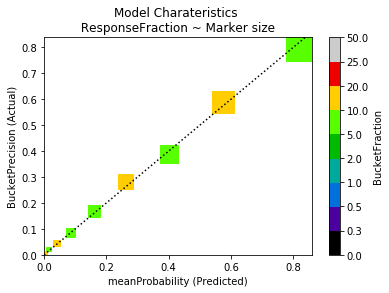

In [40]:
model_parameters = {'MLAlgorithm':'RF', # 'LGR', #  'DFF', # 'CNN', # 'CATBST', # 'XGBST'
                    'NTrees':500,
                   'MaxDepth':200,
                   'MinSamplesToSplit':10,
                   'Processors':2} 

RFModel = mltk.build_ml_model(TrainDataset, ValidateDataset, TestDataset, 
                                  model_variables=modelVariables,
                                  variable_setup = None,
                                  target_variable=targetVariable,
                                  model_attributes=model_attributes, 
                                  sample_attributes=sample_attributes, 
                                  model_parameters=model_parameters, 
                                  score_parameters=score_parameters, 
                                  return_model_object=True, 
                                  show_results=False, 
                                  show_plot=True
                                  )

In [41]:
print(RFModel.model_attributes['ModelID'])
print(RFModel.model_interpretation['ModelSummary'])
print('ROC AUC: ', RFModel.get_auc(curve='roc'))
print('PRC AUC: ', RFModel.get_auc(curve='prc'))
#print(RFModel.model_evaluation['RobustnessTable'])

INCOMELEVELRF20190812083510
                          Features  Importances    stdev
16           maritalstatus_Married      0.12765  0.11311
22            relationship_Husband      0.09396  0.10664
17     maritalstatus_Never-married      0.05343  0.06724
6       occupation_Exec-managerial      0.05063  0.01968
11       occupation_Prof-specialty      0.04706  0.01645
20         educationnumGRP_3_(8,9]      0.04362  0.00952
46       hoursperweekGRP_4_(40,60]      0.03724  0.02353
27                ageGRP_2_(20,30]      0.03509  0.01919
21        educationnumGRP_4_(9,12]      0.03055  0.00578
18         educationnumGRP_1_(1,5]      0.03005  0.00994
31                      sex_Female      0.02485  0.02223
23      relationship_Not-in-family      0.02442  0.02557
19         educationnumGRP_2_(5,8]      0.02164  0.00725
29                ageGRP_4_(40,50]      0.02141  0.00826
25          relationship_Own-child      0.02125  0.03153
41      workclass_Self-emp-not-inc      0.01806  0.00379
39 

In [42]:
RFModel.model_evaluation['RobustnessTable'].style.background_gradient(cmap='RdYlGn').set_precision(3)

,minProbability,maxProbability,meanProbability,BucketCount,ResponseCount,BucketFraction,ResponseFraction,BucketPrecision,CumulativeBucketFraction,CumulativeResponseFraction,CumulativePrecision
Quantile,,,,,,,,,,,
1,0,0.0006,7.6e-05,652,3,0.1,0.00192,0.0046,1,1,0.24
2,0.0006,0.00702,0.00316,652,7,0.1,0.00448,0.0107,0.9,0.998,0.266
3,0.00703,0.0236,0.0142,650,15,0.0998,0.00961,0.0231,0.8,0.994,0.298
4,0.0236,0.0585,0.04,652,29,0.1,0.0186,0.0445,0.7,0.984,0.337
5,0.0588,0.115,0.0843,651,56,0.1,0.0359,0.086,0.6,0.965,0.386
6,0.115,0.211,0.16,651,111,0.1,0.0711,0.171,0.5,0.93,0.446
7,0.211,0.317,0.262,655,185,0.101,0.119,0.282,0.4,0.858,0.514
8,0.317,0.475,0.402,647,251,0.0993,0.161,0.388,0.299,0.74,0.592
9,0.476,0.69,0.575,652,384,0.1,0.246,0.589,0.2,0.579,0.694


## 6.3.3 Deep Feed Forward Neural Network

In [43]:
inputShape = (len(modelVariables),)
architecture = {
        'L1':{'type': 'Dense', 'position':'input', 'units': 512, 'activation':'relu', 'input_shape':inputShape},
        'L2':{'type': 'Dense', 'position':'hidden', 'units': 512, 'activation':'relu'},
        'L3':{'type': 'Dropout', 'position':'hidden', 'rate':0.5},
        'L4':{'type': 'Dense', 'position':'output', 'units': 2, 'activation':'softmax', 'output_shape':None},
       }

Train samples: 19536 loded...
Validate samples: 6512 loded...
Test samples: 6513 loded...
{'ModelID': 'INCOMELEVELNN20190812083516', 'ModelName': 'IncomeLevel', 'Version': '0.1', 'BuiltTime': '20190812083516', 'ModelFitTime': -1}
{'MLAlgorithm': 'NN', 'BatchSize': 512, 'InputShape': (47,), 'NumClasses': 2, 'Epochs': 10, 'EvalMatrics': ['accuracy'], 'Architecture': {'L1': {'type': 'Dense', 'position': 'input', 'units': 512, 'activation': 'relu', 'input_shape': (47,)}, 'L2': {'type': 'Dense', 'position': 'hidden', 'units': 512, 'activation': 'relu'}, 'L3': {'type': 'Dropout', 'position': 'hidden', 'rate': 0.5}, 'L4': {'type': 'Dense', 'position': 'output', 'units': 2, 'activation': 'softmax', 'output_shape': None}}}
Adult Census Income Dataset
{'Edges': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'Threshold': 0.5, 'Quantiles': 10, 'ScoreVariable': 'Probability', 'ScoreLabel': 'Score', 'QuantileLabel': 'Quantile', 'PredictedLabel': 'Predicted'}
Instructions for updating:
Coloca

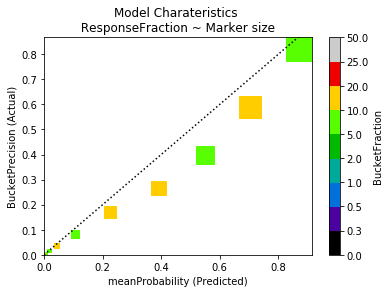

In [44]:
model_parameters = {'MLAlgorithm':'NN',
                    'BatchSize':512,
                   'InputShape':inputShape,
                   'NumClasses':2,
                   'Epochs':10,
                   'EvalMatrics':['accuracy'],
                   'Architecture':architecture} 

NNModel = mltk.build_ml_model(TrainDataset, ValidateDataset, TestDataset, 
                                  model_variables=modelVariables,
                                  variable_setup = None,
                                  target_variable=targetVariable,
                                  model_attributes=model_attributes, 
                                  sample_attributes=sample_attributes, 
                                  model_parameters=model_parameters, 
                                  score_parameters=score_parameters, 
                                  return_model_object=True, 
                                  show_results=False, 
                                  show_plot=True
                                  )

In [45]:
print(NNModel.model_attributes['ModelID'])
print(NNModel.model_interpretation['ModelSummary'])
print('ROC AUC: ', NNModel.get_auc(curve='roc'))
print('PRC AUC: ', NNModel.get_auc(curve='prc'))
#print(NNModel.model_evaluation['RobustnessTable'])

INCOMELEVELNN20190812083516
      loss      acc  val_loss  val_acc
0  0.40844  0.80267   0.37287  0.82064
1  0.35804  0.83001   0.36655  0.82740
2  0.34978  0.83497   0.36338  0.82724
3  0.34512  0.83600   0.36870  0.82617
4  0.34328  0.83779   0.36110  0.82740
5  0.34170  0.83881   0.35992  0.82663
6  0.33865  0.84014   0.37355  0.82248
7  0.33880  0.83886   0.36077  0.82786
8  0.33670  0.84070   0.38095  0.82217
9  0.33558  0.84301   0.37359  0.81880
ROC AUC:  0.8916550841958522
PRC AUC:  0.7137024150859094


In [46]:
NNModel.model_evaluation['RobustnessTable'].style.background_gradient(cmap='RdYlGn').set_precision(3)

,minProbability,maxProbability,meanProbability,BucketCount,ResponseCount,BucketFraction,ResponseFraction,BucketPrecision,CumulativeBucketFraction,CumulativeResponseFraction,CumulativePrecision
Quantile,,,,,,,,,,,
1,0.000129,0.0034,0.00179,652,2,0.1,0.00128,0.00307,1,1,0.24
2,0.00341,0.0109,0.00651,651,5,0.1,0.0032,0.00768,0.9,0.999,0.266
3,0.0109,0.0267,0.0176,651,11,0.1,0.00705,0.0169,0.8,0.996,0.298
4,0.0268,0.0655,0.0421,653,24,0.1,0.0154,0.0368,0.7,0.988,0.338
5,0.0661,0.154,0.106,650,54,0.0998,0.0346,0.0831,0.6,0.973,0.389
6,0.155,0.302,0.226,653,112,0.1,0.0717,0.172,0.5,0.939,0.45
7,0.303,0.466,0.392,653,174,0.1,0.111,0.266,0.4,0.867,0.52
8,0.466,0.621,0.549,647,257,0.0993,0.165,0.397,0.299,0.755,0.605
9,0.621,0.789,0.703,654,386,0.1,0.247,0.59,0.2,0.591,0.708


### 6.4 CatBoost

Train samples: 19536 loded...
Validate samples: 6512 loded...
Test samples: 6513 loded...
{'ModelID': 'INCOMELEVELCBST20190812083539', 'ModelName': 'IncomeLevel', 'Version': '0.1', 'BuiltTime': '20190812083539', 'ModelFitTime': -1}
{'MLAlgorithm': 'CBST', 'NTrees': 500, 'MaxDepth': 10, 'LearningRate': 0.7, 'LossFunction': 'Logloss', 'EvalMatrics': 'Accuracy', 'Imbalanced': False, 'TaskType': 'GPU', 'Processors': 2, 'UseBestModel': True}
Adult Census Income Dataset
{'Edges': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'Threshold': 0.5, 'Quantiles': 10, 'ScoreVariable': 'Probability', 'ScoreLabel': 'Score', 'QuantileLabel': 'Quantile', 'PredictedLabel': 'Predicted'}


0:	learn: 0.8288288	test: 0.8183354	best: 0.8183354 (0)	total: 309ms	remaining: 2m 34s
50:	learn: 0.8525287	test: 0.8264742	best: 0.8309275 (13)	total: 4.9s	remaining: 43.2s
100:	learn: 0.8533989	test: 0.8277027	best: 0.8309275 (13)	total: 8.07s	remaining: 31.9s
150:	learn: 0.8551392	test: 0.8295455	best: 0.8309275 (13)	total: 11.2s	remaining: 26s
200:	learn: 0.8573403	test: 0.8258600	best: 0.8309275 (13)	total: 14.8s	remaining: 22s
250:	learn: 0.8579034	test: 0.8261671	best: 0.8309275 (13)	total: 17.7s	remaining: 17.5s
300:	learn: 0.8592342	test: 0.8247850	best: 0.8309275 (13)	total: 21.2s	remaining: 14s
350:	learn: 0.8598997	test: 0.8241708	best: 0.8309275 (13)	total: 24.4s	remaining: 10.4s
400:	learn: 0.8600020	test: 0.8241708	best: 0.8309275 (13)	total: 27.1s	remaining: 6.7s
450:	learn: 0.8608210	test: 0.8223280	best: 0.8309275 (13)	total: 30s	remaining: 3.26s
499:	learn: 0.8610258	test: 0.8227887	best: 0.8309275 (13)	total: 32.8s	remaining: 0us
bestTest = 0.8309275184
bestIteratio

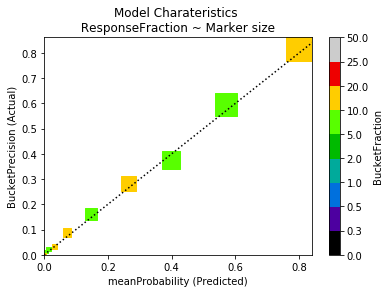

In [47]:
model_parameters = {'MLAlgorithm':'CBST',
                    'NTrees': 500,
                    'MaxDepth':10,
                    'LearningRate':0.7,
                    'LossFunction':'Logloss',#crossEntropy
                    'EvalMatrics':'Accuracy',
                    'Imbalanced':False,
                    'TaskType':'GPU',
                    'Processors':2,
                    'UseBestModel':True}

CBSTModel = mltk.build_ml_model(TrainDataset, ValidateDataset, TestDataset, 
                                  model_variables=modelVariables,
                                  variable_setup = None,
                                  target_variable=targetVariable,
                                  model_attributes=model_attributes, 
                                  sample_attributes=sample_attributes, 
                                  model_parameters=model_parameters, 
                                  score_parameters=score_parameters, 
                                  return_model_object=True, 
                                  show_results=False, 
                                  show_plot=True
                                  )

In [48]:
print(CBSTModel.model_attributes['ModelID'])
print(CBSTModel.model_interpretation['ModelSummary'])
print('ROC AUC: ', CBSTModel.get_auc(curve='roc'))
print('PRC AUC: ', CBSTModel.get_auc(curve='prc'))
#print(CBSTModel.model_evaluation['RobustnessTable'])

INCOMELEVELCBST20190812083539
                          Features  Importances
16           maritalstatus_Married     35.05471
18         educationnumGRP_1_(1,5]      5.97238
27                ageGRP_2_(20,30]      5.95503
23      relationship_Not-in-family      5.53403
19         educationnumGRP_2_(5,8]      5.28191
20         educationnumGRP_3_(8,9]      4.44906
21        educationnumGRP_4_(9,12]      3.88695
26          relationship_Unmarried      2.73511
10        occupation_Other-service      2.64971
6       occupation_Exec-managerial      2.29747
45       hoursperweekGRP_3_(35,40]      2.23193
46       hoursperweekGRP_4_(40,60]      2.10417
31                      sex_Female      2.03645
11       occupation_Prof-specialty      1.93459
36  nativecountryGRP_OtherAmericas      1.73299
41      workclass_Self-emp-not-inc      1.62943
22            relationship_Husband      1.35345
17     maritalstatus_Never-married      1.17035
8     occupation_Handlers-cleaners      1.03931
29        

In [49]:
CBSTModel.model_evaluation['RobustnessTable'].style.background_gradient(cmap='RdYlGn').set_precision(3)

,minProbability,maxProbability,meanProbability,BucketCount,ResponseCount,BucketFraction,ResponseFraction,BucketPrecision,CumulativeBucketFraction,CumulativeResponseFraction,CumulativePrecision
Quantile,,,,,,,,,,,
1,2.61e-05,0.0031,0.00147,654,3,0.1,0.00192,0.00459,1,1,0.24
2,0.0031,0.00931,0.00583,649,8,0.0996,0.00512,0.0123,0.9,0.998,0.266
3,0.00932,0.0205,0.0141,651,15,0.1,0.00961,0.023,0.8,0.993,0.298
4,0.0205,0.0481,0.0321,652,22,0.1,0.0141,0.0337,0.7,0.983,0.337
5,0.0483,0.102,0.0724,654,58,0.1,0.0372,0.0887,0.6,0.969,0.387
6,0.102,0.199,0.147,648,105,0.0995,0.0673,0.162,0.499,0.932,0.447
7,0.199,0.331,0.264,656,185,0.101,0.119,0.282,0.4,0.865,0.518
8,0.331,0.478,0.398,649,244,0.0996,0.156,0.376,0.299,0.746,0.598
9,0.478,0.682,0.57,648,386,0.0995,0.247,0.596,0.2,0.59,0.708


### 6.* Build Model using JSON input

### JSON-MLS input to create ALL variables

In [50]:
variables_setup_dict = """   
{
    "setting":"model",
    
    "variables": {            
            "category_variables" : ["sex", "race", "occupation", "workclass", "maritalstatus", "relationship"],
            "binary_variables": [],
            "target_variable":"HighIncome"
    },
    
    "preprocess_tasks": [
        {
            "type": "target",
            "out_type":"bin",
            "include": false,
            "operation": "condition",
            "variables": {
                "source": null,
                "destination": "HighIncome"
            },
            "parameters": {
                "condition_str": "income=='>50K'",
                "default": 0,
                "null": 0
            }
        },
        {
            "type": "transform",
            "out_type":"cnt",
            "include": false,
            "operation": "normalize",
            "variables": {
                "source": "age",
                "destination": "normalizedage"
            },
            "parameters": {
                "method": "zscore"
            }
        },
        {
            "type": "category_merge",
            "out_type":"cat",
            "include": true,
            "operation": "catmerge",
            "variables": {
                "source": "maritalstatus",
                "destination": "maritalstatus"
            },
            "parameters": {
                "group_value": "Married",
                "values": [ "Married-civ-spouse", "Married-spouse-absent", "Married-AF-spouse" ],
                "case": true
            }
        },
        {
            "type": "entity",
            "out_type":"cat",
            "include": true,
            "operation": "dictionary",
            "variables": {
                "source": "nativecountry",
                "destination": "nativecountryGRP"
            },
            "parameters": {
                "match_type": null,
                "dictionary": [
                    {
                        "entity": "USA",
                        "values": [ "United-States" ],
                        "case": true
                    },
                    {
                        "entity": "Canada",
                        "values": [ "Canada" ],
                        "case": true
                    },
                    {
                        "entity": "OtherAmericas",
                        "values": [ "South", "Mexico", "Trinadad&Tobago", "Jamaica", "Peru", "Nicaragua", "Dominican-Republic", "Haiti", "Ecuador", "El-Salvador", "Columbia", "Honduras", "Guatemala", "Puerto-Rico", "Cuba", "Outlying-US(Guam-USVI-etc)"],
                        "case": true
                    },
                    {
                        "entity": "Europe-Med",
                        "values": [ "Greece", "Holand-Netherlands", "Poland", "Iran", "England", "Germany", "Italy", "Ireland", "Hungary", "France", "Yugoslavia", "Scotland", "Portugal" ],
                        "case": true
                    },
                    {
                        "entity": "Asia",
                        "values": [ "Vietnam", "China", "Taiwan", "India", "Philippines", "Japan", "Hong", "Cambodia", "Laos", "Thailand" ],
                        "case": true
                    },
                    {
                        "entity": "Other",
                        "values": [ "?" ],
                        "case": true
                    }
                ],
                "null": "NA",
                "default": "OTHER"
            }
        },
        {
            "type": "category",
            "out_type":"cat",
            "include": true,
            "operation": "bucket",
            "variables": {
                "source": "age",
                "destination": null
            },
            "parameters": {
                "labels_str": [ "0", "20", "30", "40", "50", "60", "INF" ],
                "right_inclusive": true,
                "default": "OTHER",
                "null": "NA"
            }
        },
        {
            "type": "category",
            "out_type":"cat",
            "include": true,
            "operation": "bucket",
            "variables": {
                "source": "educationnum",
                "destination": null
            },
            "parameters": {
                "labels_str": [ "1", "5", "8", "9", "12", "16" ],
                "right_inclusive": true,
                "default": "OTHER",
                "null": "NA"
            }
        },
        {
            "type": "category",
            "out_type":"cat",
            "include": true,
            "operation": "bucket",
            "variables": {
                "source": "hoursperweek",
                "destination": null
            },
            "parameters": {
                "labels_str": [ "0", "20", "35", "40", "60", "INF" ],
                "right_inclusive": true,
                "default": "OTHER",
                "null": "NA"
            }
        }
    ]
}
"""

### JSON-MLS input to Build Model

In [51]:
model_setup_dict="""
{
    "sample_split": [0.6, 0.2, 0.2],
    
    "sample_attributes" : {
        "SampleDescription":"Adult Census Income Dataset",
        "NumClasses":2,
        "RecordIdentifiers": ["ID"],
        "ModelDataStats":null
    },
    
    "score_parameters" : {
        "Edges":[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        "Threshold":0.5,
        "Quantiles":10,
        "ScoreVariable":"Probability",
        "ScoreLabel":"Score",
        "QuantileLabel":"Quantile",
        "PredictedLabel":"Predicted"
    },
    
    "model_attributes" : {
        "ModelID": null,   
        "ModelName": "IncomeLevel",
        "Version":"0.1"
    },
    
    "model_parameters" : {
        "MLAlgorithm":"LGR", 
        "MaxIterations":100
    },
        
    "model_outputs" : {
        "return_model_object":true, 
        "show_results":false, 
        "show_plot":false
    },
    
    "target_variable": "HighIncome",
    
    "model_variables" : [
        "race_Amer-Indian-Eskimo",
        "race_Asian-Pac-Islander",
        "race_Black",
        "race_Other",
        "occupation_Adm-clerical",
        "occupation_Craft-repair",
        "occupation_Exec-managerial",
        "occupation_Farming-fishing",
        "occupation_Handlers-cleaners",
        "occupation_Machine-op-inspct",
        "occupation_Other-service",
        "occupation_Prof-specialty",
        "occupation_Protective-serv",
        "occupation_Sales",
        "occupation_Tech-support",
        "maritalstatus_Divorced",
        "maritalstatus_Married",
        "maritalstatus_Never-married",
        "educationnumGRP_1_(1,5]",
        "educationnumGRP_2_(5,8]",
        "educationnumGRP_3_(8,9]",
        "educationnumGRP_4_(9,12]",
        "relationship_Husband",
        "relationship_Not-in-family",
        "relationship_Other-relative",
        "relationship_Own-child",
        "relationship_Unmarried",
        "ageGRP_2_(20,30]",
        "ageGRP_3_(30,40]",
        "ageGRP_4_(40,50]",
        "ageGRP_5_(50,60]",
        "sex_Female",
        "nativecountryGRP_Asia",
        "nativecountryGRP_Canada",
        "nativecountryGRP_Europe-Med",
        "nativecountryGRP_Other",
        "nativecountryGRP_OtherAmericas",
        "workclass_Federal-gov",
        "workclass_Local-gov",
        "workclass_Private",
        "workclass_Self-emp-inc",
        "workclass_Self-emp-not-inc",
        "workclass_State-gov",
        "hoursperweekGRP_1_(0,20]",
        "hoursperweekGRP_2_(20,35]",
        "hoursperweekGRP_3_(35,40]",
        "hoursperweekGRP_4_(40,60]"
    ]
}
"""

In [52]:
model_building_setup_dict = '''
{
    "model_setup_dict":''' + model_setup_dict + ''',
    "variables_setup_dict":''' + variables_setup_dict + '''
}
'''

In [53]:
# Load dataset
Data_ = mltk.read_data_csv(file=r'C:\Projects\Data\incomedata.csv')
# Clean column names (remove special characters)
Data = mltk.clean_column_names(Data_, replace='')
# Add ID column
Data_ = mltk.add_identity_column(Data_, id_label='ID', start=1, increment=1)

## Method 1
#DataDict = {"TrainDataset":TrainDataset, "ValidateDataset":ValidateDataset, "TestDataset":TestDataset}
#TestModel = mltk.build_ml_model_task(DataDict, model_setup_dict, variables_setup_dict=variables_setup_dict)

## Method 2
TestModel = mltk.build_ml_model_task(Data_, model_setup_dict, variables_setup_dict=variables_setup_dict)

## Method 3
#TestModel = mltk.build_ml_model_from_data_task(Data_, model_building_setup_dict)

print(TestModel.model_attributes['ModelID'])
print(TestModel.model_interpretation['ModelSummary'])
print('ROC AUC: ', TestModel.get_auc(curve='roc'))
print('PRC AUC: ', TestModel.get_auc(curve='prc'))
TestModel.model_evaluation['RobustnessTable'].style.background_gradient(cmap='RdYlGn').set_precision(3)

Train Samples: 19536 [60.0%]
Validate Samples: 6512 [20.0%]
Test Samples: 6513 [20.0%]
Train samples: 19536 loded...
Validate samples: 6512 loded...
Test samples: 6513 loded...
{'ModelID': 'INCOMELEVELLGR20190812083621', 'ModelName': 'IncomeLevel', 'Version': '0.1', 'BuiltTime': '20190812083621', 'ModelFitTime': -1}
{'MLAlgorithm': 'LGR', 'MaxIterations': 100}
Adult Census Income Dataset
{'Edges': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'Threshold': 0.5, 'Quantiles': 10, 'ScoreVariable': 'Probability', 'ScoreLabel': 'Score', 'QuantileLabel': 'Quantile', 'PredictedLabel': 'Predicted'}
Optimization terminated successfully.
         Current function value: 0.343935
         Iterations 9
INCOMELEVELLGR20190812083621
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                19536
Model:                          Logit   Df Residuals:                    19489
Method:                   

,minProbability,maxProbability,meanProbability,BucketCount,ResponseCount,BucketFraction,ResponseFraction,BucketPrecision,CumulativeBucketFraction,CumulativeResponseFraction,CumulativePrecision
Quantile,,,,,,,,,,,
1,0.000183,0.00479,0.00266,659,4,0.101,0.00256,0.00607,1,1,0.24
2,0.00479,0.0118,0.00798,646,5,0.0992,0.0032,0.00774,0.899,0.997,0.266
3,0.0118,0.0251,0.0181,649,13,0.0996,0.00833,0.02,0.8,0.994,0.298
4,0.0251,0.0533,0.0376,651,23,0.1,0.0147,0.0353,0.7,0.986,0.338
5,0.0533,0.111,0.0801,652,57,0.1,0.0365,0.0874,0.6,0.971,0.388
6,0.112,0.199,0.152,651,94,0.1,0.0602,0.144,0.5,0.935,0.448
7,0.199,0.309,0.252,651,191,0.1,0.122,0.293,0.4,0.874,0.524
8,0.309,0.46,0.385,651,253,0.1,0.162,0.389,0.3,0.752,0.601
9,0.461,0.677,0.561,651,381,0.1,0.244,0.585,0.2,0.59,0.707


## 7. Model Evaluation (Performance Comparison) <a class="anchor" id="evaluate"></a>
[^](#toc) 

### 7.1 ROC Curve, True Positive Rate (TPR) vs.False Positive Rate (FPR)
#### References
* T. Fawcett, An introduction to ROC analysis, Pattern Recognition Letters, Volume 27, Issue 8, June 2006, Pages 861-874. doi.org/10.1016/j.patrec.2005.10.010. 
* sklearn.metrics.roc_curve, http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

Using matplotlib backend: Qt5Agg


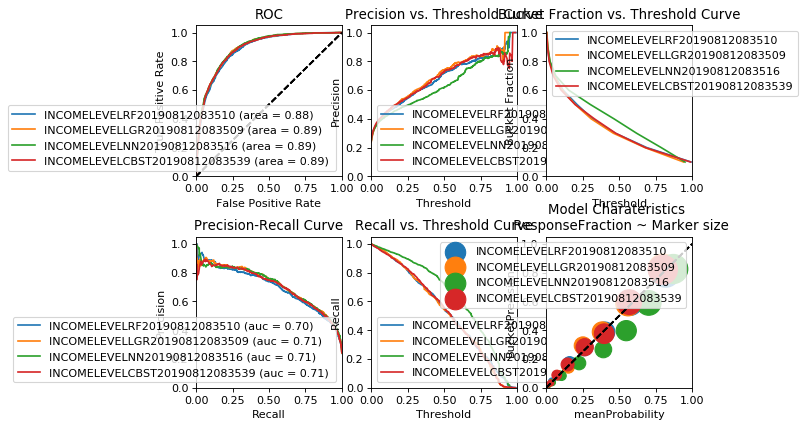

In [54]:
%matplotlib auto

RFModel.plot_eval_matrics(comparison=True)
LGRModel.plot_eval_matrics(comparison=True)
NNModel.plot_eval_matrics(comparison=True)
CBSTModel.plot_eval_matrics(comparison=True)

### Area Under Curve (AUC) Comparison

In [55]:
Models = [LGRModel, RFModel, CBSTModel, NNModel]
ModelsComp = mltk.model_guages_comparison(Models)
ModelsComp.style.background_gradient(cmap='RdYlGn').set_precision(3)

,Model,PRC_AUC,ROC_AUC
0,INCOMELEVELLGR20190812083509,0.714,0.891
1,INCOMELEVELRF20190812083510,0.7,0.882
2,INCOMELEVELCBST20190812083539,0.706,0.888
3,INCOMELEVELNN20190812083516,0.714,0.892


### 7.2 Generate scores

,minProbability,maxProbability,meanProbability,BucketCount,ResponseCount,BucketFraction,ResponseFraction,BucketPrecision,CumulativeBucketFraction,CumulativeResponseFraction,CumulativePrecision
Score,,,,,,,,,,,
1,0.000183,0.1,0.026,3121,84,0.479,0.0538,0.0269,1,1,0.24
2,0.1,0.2,0.145,804,114,0.123,0.073,0.142,0.521,0.946,0.435
3,0.2,0.3,0.251,608,179,0.0934,0.115,0.294,0.397,0.873,0.527
4,0.3,0.4,0.355,457,166,0.0702,0.106,0.363,0.304,0.758,0.598
5,0.4,0.499,0.454,375,167,0.0576,0.107,0.445,0.234,0.652,0.668
6,0.5,0.599,0.552,307,184,0.0471,0.118,0.599,0.176,0.545,0.741
7,0.601,0.7,0.653,233,159,0.0358,0.102,0.682,0.129,0.427,0.793
8,0.7,0.798,0.752,248,201,0.0381,0.129,0.81,0.0934,0.325,0.836
9,0.8,0.897,0.841,327,278,0.0502,0.178,0.85,0.0553,0.197,0.853


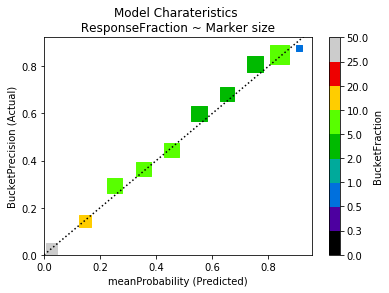

In [56]:
scoreVariable = LGRModel.get_score_variable()
scoreLabel = LGRModel.get_score_label()

TestDataset = mltk.score_processed_dataset(TestDataset, LGRModel, edges=None, score_label=None, fill_missing=0)
Robustnesstable = mltk.robustness_table(ResultsSet=TestDataset, target_variable=targetVariable, score_variable=scoreVariable,  score_label=scoreLabel, show_plot=True)
Robustnesstable.style.background_gradient(cmap='RdYlGn').set_precision(3)

### 7.3 Confusion Matrix [actual, predicted]

### Confusion Matrix Terms
#### For a Binary Classifier
* TN= CF[0,0], FP= CF[0,1], FN= CF[1,0], TP= CF[1,1]
* Accuracy (ACC) = (TP+TN)/TOTAL
* Hit Rate, Sensitivity, Recall or True Positive Rate (TPR) = TP/(TP+FN)
* False Positive Rate (FPR) = FP/(FP+TN) 
* Specificity or True Negative Rate (TNR) = TN/(FP+TN)
* Miss Rate or False Negative rate (FNR) = FN/(FN+TP) 
* Positive Predictive Value or Precision (PPV) = TP/(TP+FP) 
* Harmonic Mean of Precision and Sensitivity or F1 score (F1) = 2TP/(2TP+FP+FN)

#### For a Multi-class Classifier
* TPS = Diagonal(CF)
* SUCCESS = Sum(TPS)
* Sum of Actual Conditions (ASUM) = RowSum(CF)
* Sum of Predicted conditions (PSUM) = ColumnsSum(CF)
* Positive Predictive Value or Precision for Class i (PPV[i]) = TPS[i]/PSUM
* Hit Rate, Sensitivity, Recall or True Positive Rate for Class i (TPR[i]) = TPS[i]/ASUM

##### References: 
* C. Beleites, R. Salzer, V. Sergo, Validation of soft classification models using partial class memberships: An extended concept of sensitivity & co. applied to grading of astrocytoma tissues, Chemometrics and Intelligent Laboratory Systems Volume 122, 15 March 2013, Pages 12-22. doi.org/10.1016/j.chemolab.2012.12.003.
* sklearn.metrics.confusion_matrix, http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
* Confusion Matrix, http://www2.cs.uregina.ca/~dbd/cs831/notes/ROC/ROC.html.




In [57]:
scoreVariable = LGRModel.get_score_variable()
scoreLabel = LGRModel.get_score_label()

threshold = 0.8
TestDataset = mltk.set_predicted_columns(TestDataset, scoreVariable, threshold=threshold)
ConfusionMatrix = mltk.confusion_matrix(TestDataset, actual_variable=targetVariable, predcted_variable='Predicted', labels=[0,1], sample_weight=None, totals=True)
ConfusionMatrix.style.background_gradient(cmap='Greens').set_precision(3)  

In [58]:
scoreLabel

'Score'

### 7.3 Comparison of Models and Thresholds

#### Probabilty Threshold

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    0.3s finished


6513/6513 [==============================] - 0s 4us/sample


,ModelID,TN,FP,FN,TP,TOTAL,P1,P0,A1,A0,TPR,TNR,FPR,FNR,PPV,ACC,F1
0,INCOMELEVELLGR20190812083509_[TH=0.7],4852,100,1053,508,6513,608,5905,1561,4952,0.325,0.98,0.0202,0.675,0.836,0.823,0.468
1,INCOMELEVELLGR20190812083509_[TH=0.8],4899,53,1254,307,6513,360,6153,1561,4952,0.197,0.989,0.0107,0.803,0.853,0.799,0.32
2,INCOMELEVELLGR20190812083509_[TH=0.9],4948,4,1532,29,6513,33,6480,1561,4952,0.0186,0.999,0.000808,0.981,0.879,0.764,0.0364
3,INCOMELEVELRF20190812083510_[TH=0.7],4828,124,1057,504,6513,628,5885,1561,4952,0.323,0.975,0.025,0.677,0.803,0.819,0.46
4,INCOMELEVELRF20190812083510_[TH=0.8],4889,63,1249,312,6513,375,6138,1561,4952,0.2,0.987,0.0127,0.8,0.832,0.799,0.322
5,INCOMELEVELRF20190812083510_[TH=0.9],4937,15,1443,118,6513,133,6380,1561,4952,0.0756,0.997,0.00303,0.924,0.887,0.776,0.139
6,INCOMELEVELCBST20190812083539_[TH=0.7],4849,103,1065,496,6513,599,5914,1561,4952,0.318,0.979,0.0208,0.682,0.828,0.821,0.459
7,INCOMELEVELCBST20190812083539_[TH=0.8],4900,52,1273,288,6513,340,6173,1561,4952,0.184,0.989,0.0105,0.816,0.847,0.797,0.303
8,INCOMELEVELCBST20190812083539_[TH=0.9],4945,7,1534,27,6513,34,6479,1561,4952,0.0173,0.999,0.00141,0.983,0.794,0.763,0.0339
9,INCOMELEVELNN20190812083516_[TH=0.7],4724,228,809,752,6513,980,5533,1561,4952,0.482,0.954,0.046,0.518,0.767,0.841,0.592


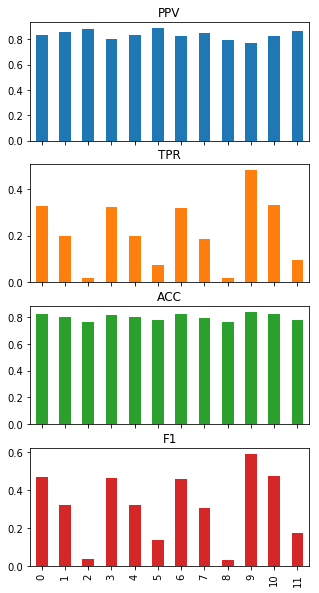

In [59]:
Models = [LGRModel, RFModel, CBSTModel, NNModel]
thresholds=[0.7, 0.8, 0.9]
ConfusionMatrixComparison = mltk.confusion_matrix_comparison(TestDataset, Models, thresholds, score_variable=None, show_plot=True)
ConfusionMatrixComparison.style.background_gradient(cmap='RdYlGn').set_precision(3)

#### Score (1-10) Threshold

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    0.3s finished


6513/6513 [==============================] - 0s 5us/sample


,ModelID,TN,FP,FN,TP,TOTAL,P1,P0,A1,A0,TPR,TNR,FPR,FNR,PPV,ACC,F1
0,INCOMELEVELLGR20190812083509_[TH=7],4852,100,1053,508,6513,608,5905,1561,4952,0.325,0.98,0.0202,0.675,0.836,0.823,0.468
1,INCOMELEVELLGR20190812083509_[TH=8],4899,53,1254,307,6513,360,6153,1561,4952,0.197,0.989,0.0107,0.803,0.853,0.799,0.32
2,INCOMELEVELLGR20190812083509_[TH=9],4948,4,1532,29,6513,33,6480,1561,4952,0.0186,0.999,0.000808,0.981,0.879,0.764,0.0364
3,INCOMELEVELRF20190812083510_[TH=7],4828,124,1057,504,6513,628,5885,1561,4952,0.323,0.975,0.025,0.677,0.803,0.819,0.46
4,INCOMELEVELRF20190812083510_[TH=8],4889,63,1249,312,6513,375,6138,1561,4952,0.2,0.987,0.0127,0.8,0.832,0.799,0.322
5,INCOMELEVELRF20190812083510_[TH=9],4937,15,1443,118,6513,133,6380,1561,4952,0.0756,0.997,0.00303,0.924,0.887,0.776,0.139
6,INCOMELEVELCBST20190812083539_[TH=7],4849,103,1065,496,6513,599,5914,1561,4952,0.318,0.979,0.0208,0.682,0.828,0.821,0.459
7,INCOMELEVELCBST20190812083539_[TH=8],4900,52,1273,288,6513,340,6173,1561,4952,0.184,0.989,0.0105,0.816,0.847,0.797,0.303
8,INCOMELEVELCBST20190812083539_[TH=9],4945,7,1534,27,6513,34,6479,1561,4952,0.0173,0.999,0.00141,0.983,0.794,0.763,0.0339
9,INCOMELEVELNN20190812083516_[TH=7],4724,228,809,752,6513,980,5533,1561,4952,0.482,0.954,0.046,0.518,0.767,0.841,0.592


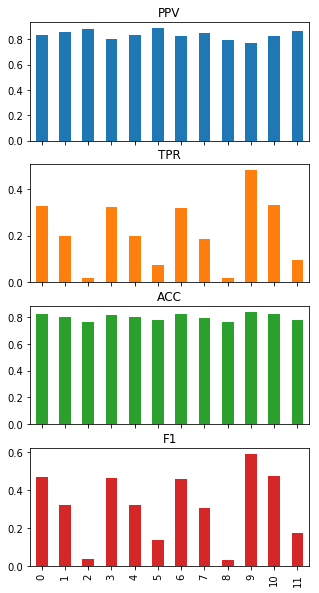

In [60]:
Models = [LGRModel, RFModel, CBSTModel, NNModel]
thresholds=[7, 8, 9]
ConfusionMatrixComparison = mltk.confusion_matrix_comparison(TestDataset, Models, thresholds, score_variable=scoreLabel, show_plot=True)
ConfusionMatrixComparison.style.background_gradient(cmap='RdYlGn').set_precision(3)


### 7.4 Set Custom Score Edges

### Re-bin quantiles

ROC AUC 0.8907408624395736
PRC AUC 0.7142964435794291


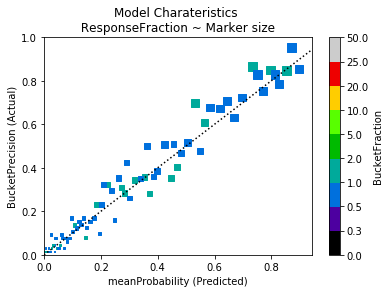

In [61]:
SelectModel = LGRModel

scoreVariable = SelectModel.get_score_variable()
scoreLabel = SelectModel.get_score_label()

TestDataset = mltk.score_processed_dataset(TestDataset, SelectModel, edges=None, score_label=None, fill_missing=0)

RobustnessTable, ROCCurve, PrecisionRecallCurve, roc_auc, prc_auc = mltk.model_performance_matrics(ResultsSet=TestDataset, target_variable=targetVariable, score_variable=scoreVariable, quantile_label='Quantile',  quantiles=100, show_plot=True)
print('ROC AUC', roc_auc)
print('PRC AUC', prc_auc)

In [62]:
quantiles=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
edges, threshold = mltk.get_score_cutoffs(ResultsSet=TestDataset, quantiles=quantiles, target_variable=targetVariable, score_variable=scoreVariable)
print('Threshold', threshold)
print('Edges', edges)

Threshold 0.3919
Edges [0.0, 0.0048, 0.0118, 0.0251, 0.0533, 0.1115, 0.1988, 0.3091, 0.4615, 0.6775, 1.0]


,meanProbability,BucketPrecision,BucketCount,ResponseCount,CumulativeBucketFraction,CumulativeResponseFraction,CumulativePrecision
Score,,,,,,,
1,0.00266,0.00606,660,4,1,1,0.24
2,0.00801,0.0077,649,5,0.899,0.997,0.266
3,0.0181,0.0202,645,13,0.799,0.994,0.298
4,0.0376,0.0354,650,23,0.7,0.986,0.338
5,0.0801,0.0873,653,57,0.6,0.971,0.388
6,0.152,0.143,663,95,0.5,0.935,0.448
7,0.253,0.297,639,190,0.398,0.874,0.526
8,0.385,0.39,652,254,0.3,0.752,0.601
9,0.562,0.586,652,382,0.2,0.589,0.707


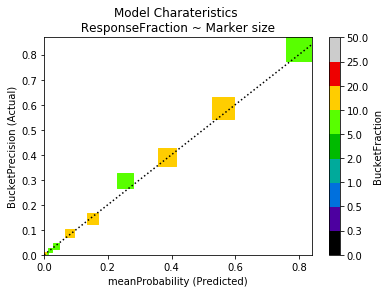

In [63]:
# Adjest or keep edge values
edges = [0.0, 0.0048, 0.0118, 0.0251, 0.0533, 0.1115, 0.1988, 0.3091, 0.4615, 0.6775, 1.0]
SelectModel.set_score_edges(edges)

# update threshold value
#SelectModel.set_predict_threshold(threshold)

TestDataset = mltk.score_processed_dataset(TestDataset, SelectModel, edges=None, score_label=None, fill_missing=0)
Robustnesstable = mltk.robustness_table(ResultsSet=TestDataset, target_variable=targetVariable, score_variable=scoreVariable,  score_label=scoreLabel, condensed=True, show_plot=True)
Robustnesstable.style.background_gradient(cmap='RdYlGn').set_precision(3)

In [65]:
SelectModel.get_model_manifest()

{'model_attributes': {'ModelID': 'INCOMELEVELLGR20190812083509',
  'ModelName': 'IncomeLevel',
  'Version': '0.1',
  'BuiltTime': '20190812083509',
  'ModelFitTime': -1,
  'MLTool': 'statsmodels=0.9.0'},
 'model_parameters': {'MLAlgorithm': 'LGR', 'MaxIterations': 100},
 'score_parameters': {'Edges': [0.0,
   0.0048,
   0.0118,
   0.0251,
   0.0533,
   0.1115,
   0.1988,
   0.3091,
   0.4615,
   0.6775,
   1.0],
  'Threshold': 0.5,
  'Quantiles': 10,
  'ScoreVariable': 'Probability',
  'ScoreLabel': 'Score',
  'QuantileLabel': 'Quantile',
  'PredictedLabel': 'Predicted'},
 'sample_attributes': {'SampleDescription': 'Adult Census Income Dataset',
  'NumClasses': 2,
  'RecordIdentifiers': ['ID'],
  'ModelDataStats':                   count unique             top   freq        mean         std       min       10%         25%         50%         75%         90%         max   dtypes
  ID                32561   None            None   None       16281      9399.7         1      3257        81

### 7.5 Save Models

In [66]:
saveFilePath = '{}.pkl'.format(SelectModel.get_model_id())
mltk.save_model(SelectModel, saveFilePath)

Saving model to file INCOMELEVELLGR20190812083509.pkl


## 8. Generate Predicted Value (Score) <a class="anchor" id="deploy"></a>
[^](#toc) 

### 8.1 Define ETL Function

In [67]:
def ETL(DataFrame, variables_setup_dict=None):
    # Add ID column
    DataFrame = mltk.add_identity_column(DataFrame, id_label='ID', start=1, increment=1)
    
    # Clean column names
    DataFrame = mltk.clean_column_names(DataFrame, replace='')
    input_columns = list(DataFrame.columns)

    variables_setup_dict = """   
    {
        "setting":"score",

        "variables": {            
                "category_variables" : ["sex", "race", "occupation", "workclass", "maritalstatus", "relationship"],
                "binary_variables": [],
                "target_variable":"HighIncome"
        },

        "preprocess_tasks": [
            {
                "type": "transform",
                "out_type":"cnt",
                "include": false,
                "operation": "normalize",
                "variables": {
                    "source": "age",
                    "destination": "normalizedage"
                },
                "parameters": {
                    "method": "zscore"
                }
            },
            {
                "type": "category_merge",
                "out_type":"cat",
                "include": true,
                "operation": "catmerge",
                "variables": {
                    "source": "maritalstatus",
                    "destination": "maritalstatus"
                },
                "parameters": {
                    "group_value": "Married",
                    "values": [ "Married-civ-spouse", "Married-spouse-absent", "Married-AF-spouse" ]
                }
            },
            {
                "type": "entity",
                "out_type":"cat",
                "include": true,
                "operation": "dictionary",
                "variables": {
                    "source": "nativecountry",
                    "destination": "nativecountryGRP"
                },
                "parameters": {
                    "match_type": null,
                    "dictionary": [
                        {
                            "entity": "USA",
                            "values": [ "United-States" ],
                            "case": true
                        },
                        {
                            "entity": "Canada",
                            "values": [ "Canada" ],
                            "case": true
                        },
                        {
                            "entity": "OtherAmericas",
                            "values": [ "South", "Mexico", "Trinadad&Tobago", "Jamaica", "Peru", "Nicaragua", "Dominican-Republic", "Haiti", "Ecuador", "El-Salvador", "Columbia", "Honduras", "Guatemala", "Puerto-Rico", "Cuba", "Outlying-US(Guam-USVI-etc)"],
                            "case": true
                        },
                        {
                            "entity": "Europe-Med",
                            "values": [ "Greece", "Holand-Netherlands", "Poland", "Iran", "England", "Germany", "Italy", "Ireland", "Hungary", "France", "Yugoslavia", "Scotland", "Portugal" ],
                            "case": true
                        },
                        {
                            "entity": "Asia",
                            "values": [ "Vietnam", "China", "Taiwan", "India", "Philippines", "Japan", "Hong", "Cambodia", "Laos", "Thailand" ],
                            "case": true
                        },
                        {
                            "entity": "Other",
                            "values": [ "?" ],
                            "case": true
                        }
                    ],
                    "null": "NA",
                    "default": "OTHER"
                }
            },
            {
                "type": "category",
                "out_type":"cat",
                "include": true,
                "operation": "bucket",
                "variables": {
                    "source": "age",
                    "destination": null
                },
                "parameters": {
                    "labels_str": [ "0", "20", "30", "40", "50", "60", "INF" ],
                    "right_inclusive": true,
                    "default": "OTHER",
                    "null": "NA"
                }
            },
            {
                "type": "category",
                "out_type":"cat",
                "include": true,
                "operation": "bucket",
                "variables": {
                    "source": "educationnum",
                    "destination": null
                },
                "parameters": {
                    "labels_str": [ "1", "5", "8", "9", "12", "16" ],
                    "right_inclusive": true,
                    "default": "OTHER",
                    "null": "NA"
                }
            },
            {
                "type": "category",
                "out_type":"cat",
                "include": true,
                "operation": "bucket",
                "variables": {
                    "source": "hoursperweek",
                    "destination": null
                },
                "parameters": {
                    "labels_str": [ "0", "20", "35", "40", "60", "INF" ],
                    "right_inclusive": true,
                    "default": "OTHER",
                    "null": "NA"
                }
            }
        ]
    }
    """
    
    DataFrame, categoryVariables, binaryVariables, targetVariable = mltk.setup_variables_task(DataFrame, variables_setup_dict)
    
    # Create One Hot Encoded Variables
    DataFrame, featureVariables, targetVariable = mltk.to_one_hot_encode(DataFrame, category_variables=categoryVariables, binary_variables=binaryVariables, target_variable=targetVariable)

    return DataFrame, input_columns

### 8.2 Load Model Object and Input Data

In [68]:
MLModelObject = mltk.load_model(saveFilePath)

TestInput = """
{
      "ID": "A001",
      "age": 32,
      "workclass": "Private",
      "education": "Doctorate",
      "education-num": 16,
      "marital-status": "Married-civ-spouse",
      "occupation": "Prof-specialty",
      "relationship": "Husband",
      "race": "Asian-Pac-Islander",
      "sex": "Male",
      "capital-gain": 0,
      "capital-loss": 0,
      "hours-per-week": 40,
      "native-country": "?"
}
"""

Loading model from file INCOMELEVELLGR20190812083509.pkl


### 8.3 Generate Scores

In [69]:
output = mltk.score_records(TestInput, MLModelObject, edges=None, ETL=ETL, return_type='dict') # Other options for return_type, {'json', 'frame'}
output[0]

Column ID exists in the DataFrame


{'ID': 'A001',
 'age': 32,
 'capitalgain': 0,
 'capitalloss': 0,
 'education': 'Doctorate',
 'educationnum': 16,
 'hoursperweek': 40,
 'maritalstatus': 'Married',
 'nativecountry': '?',
 'occupation': 'Prof-specialty',
 'race': 'Asian-Pac-Islander',
 'relationship': 'Husband',
 'sex': 'Male',
 'workclass': 'Private',
 'Probability': 0.6612561010199076,
 'Score': 9,
 'Predicted': 1}

<hr>
This notebook and related materials were developed by Sumudu Tennakoon to demostrate the MLToolkit python library and its interoperability with the standared Python data analysis and machine learning packages (e.g. Pandas, Sci-kitlearn, Statsmodel, TensorFlow, Catboost, etc.)
Create Date: July 01, 2018; Last Update: August 12, 2019. 
Apache License, Version 2.0 (http://www.apache.org/licenses/LICENSE-2.0)